In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels import api as sm
from statsmodels.formula import api as smf

In [95]:
sweep_df = pd.read_csv('../figures/search_PB20200519.csv', index_col=0)

In [96]:
sweep_df.head(10)

,lr,betas,filters,pool_size,fully_connected,drop,train_loss,validation_loss,loss_diff,train_precision,validation_precision,train_recall,validation_recall,train_f1_score,validation_f1_score,epoch_time
0,0.0018,"(0.9, 0.99)","(64, 8)",2,50,0.0,2.517752,2.581644,0.063893,0.332037,0.264183,0.355575,0.288687,0.334575,0.270199,8.795860
1,0.0030,"(0.9, 0.99)","(64, 8)",2,50,0.0,2.507281,2.565073,0.057792,0.358935,0.302480,0.365963,0.305000,0.350668,0.290867,8.607903
2,0.0018,"(0.9, 0.99)","(64, 8)",2,50,0.2,2.562255,2.578973,0.016717,0.354284,0.360121,0.308481,0.292125,0.292429,0.277540,8.819322
3,0.0030,"(0.9, 0.99)","(64, 8)",2,50,0.2,2.591702,2.603001,0.011300,0.326519,0.318753,0.277263,0.265750,0.259911,0.248579,8.966284
4,0.0018,"(0.9, 0.99)","(64, 8)",2,50,0.4,2.626372,2.636712,0.010340,0.351283,0.319023,0.243312,0.231875,0.235571,0.219408,8.889139
5,0.0030,"(0.9, 0.99)","(64, 8)",2,50,0.4,2.762005,2.760452,-0.001553,0.327631,0.335185,0.110369,0.111937,0.085428,0.087563,8.961769
6,0.0018,"(0.9, 0.99)","(64, 8)",2,100,0.0,2.511733,2.584084,0.072351,0.366115,0.282562,0.361869,0.285250,0.345090,0.269091,8.773988
7,0.0030,"(0.9, 0.99)","(64, 8)",2,100,0.0,2.523828,2.582442,0.058614,0.359389,0.297146,0.348769,0.287750,0.333175,0.273806,8.822034
8,0.0018,"(0.9, 0.99)","(64, 8)",2,100,0.2,2.568390,2.582492,0.014102,0.337905,0.321025,0.302031,0.286938,0.291079,0.274029,8.898290
9,0.0030,"(0.9, 0.99)","(64, 8)",2,100,0.2,2.596622,2.609221,0.012599,0.355151,0.352198,0.273775,0.260000,0.264213,0.248637,8.837053


In [97]:
mask_top50 = sweep_df.validation_f1_score.rank(ascending=False) <= 50.0
sweep_df[mask_top50].sort_values('validation_f1_score', ascending=False)

,lr,betas,filters,pool_size,fully_connected,drop,train_loss,validation_loss,loss_diff,train_precision,validation_precision,train_recall,validation_recall,train_f1_score,validation_f1_score,epoch_time
176,0.0018,"(0.9, 0.99)","(96, 32)",2,150,0.2,2.482996,2.526890,0.043895,0.397751,0.355314,0.389025,0.344063,0.378859,0.333233,8.547971
182,0.0018,"(0.9, 0.99)","(96, 32)",5,50,0.2,2.492771,2.528745,0.035974,0.372322,0.342887,0.379456,0.342625,0.360606,0.323713,6.751253
177,0.0030,"(0.9, 0.99)","(96, 32)",2,150,0.2,2.487057,2.538559,0.051501,0.383358,0.335212,0.384800,0.332000,0.373869,0.322364,8.480521
164,0.0018,"(0.9, 0.99)","(96, 32)",2,50,0.2,2.491050,2.532756,0.041706,0.380409,0.340137,0.380856,0.337562,0.364857,0.322258,8.447631
165,0.0030,"(0.9, 0.99)","(96, 32)",2,50,0.2,2.498391,2.537385,0.038995,0.370041,0.324613,0.373200,0.333813,0.358474,0.318512,8.366898
170,0.0018,"(0.9, 0.99)","(96, 32)",2,100,0.2,2.497872,2.544018,0.046145,0.393934,0.346412,0.374481,0.326813,0.366149,0.317763,8.358926
195,0.0030,"(0.9, 0.99)","(96, 32)",5,150,0.2,2.519860,2.549197,0.029337,0.376669,0.346443,0.351531,0.321500,0.345237,0.315728,6.637435
188,0.0018,"(0.9, 0.99)","(96, 32)",5,100,0.2,2.506754,2.544272,0.037518,0.377049,0.338482,0.364750,0.326062,0.351791,0.313100,6.820103
171,0.0030,"(0.9, 0.99)","(96, 32)",2,100,0.2,2.514906,2.553119,0.038213,0.391398,0.348559,0.356725,0.317437,0.352524,0.310999,8.362759
194,0.0018,"(0.9, 0.99)","(96, 32)",5,150,0.2,2.509633,2.547467,0.037834,0.354818,0.319633,0.361700,0.322375,0.344370,0.307526,6.763975


In [98]:
f1_rank = sweep_df.validation_f1_score.rank(ascending=False)
diff_rank = sweep_df.loss_diff.rank(ascending=True)

corank = (f1_rank + diff_rank) / 2
sweep_df['corank'] = corank

sweep_df.sort_values('corank', ascending=True).head(10)

,lr,betas,filters,pool_size,fully_connected,drop,train_loss,validation_loss,loss_diff,train_precision,validation_precision,train_recall,validation_recall,train_f1_score,validation_f1_score,epoch_time,corank
196,0.0018,"(0.9, 0.99)","(96, 32)",5,150,0.4,2.552774,2.565785,0.013010,0.344060,0.337852,0.317556,0.304688,0.303163,0.291286,6.657676,59.0
178,0.0018,"(0.9, 0.99)","(96, 32)",2,150,0.4,2.532757,2.555654,0.022897,0.360783,0.322697,0.338606,0.313063,0.326584,0.301745,8.455115,66.0
111,0.0030,"(0.9, 0.99)","(96, 8)",2,50,0.2,2.547603,2.561833,0.014230,0.336629,0.331878,0.323244,0.309688,0.301974,0.288027,8.311475,66.5
183,0.0030,"(0.9, 0.99)","(96, 32)",5,50,0.2,2.525395,2.551309,0.025914,0.366543,0.343650,0.345469,0.319750,0.333531,0.306830,6.691873,66.5
182,0.0018,"(0.9, 0.99)","(96, 32)",5,50,0.2,2.492771,2.528745,0.035974,0.372322,0.342887,0.379456,0.342625,0.360606,0.323713,6.751253,66.5
86,0.0018,"(0.9, 0.99)","(64, 32)",5,150,0.2,2.527812,2.554001,0.026189,0.359482,0.335987,0.343306,0.317188,0.331540,0.304905,7.467725,67.5
195,0.0030,"(0.9, 0.99)","(96, 32)",5,150,0.2,2.519860,2.549197,0.029337,0.376669,0.346443,0.351531,0.321500,0.345237,0.315728,6.637435,68.0
191,0.0030,"(0.9, 0.99)","(96, 32)",5,100,0.4,2.552579,2.567213,0.014634,0.346763,0.337435,0.318431,0.301750,0.304206,0.288014,6.938185,69.5
122,0.0018,"(0.9, 0.99)","(96, 8)",2,150,0.2,2.549022,2.567143,0.018121,0.361965,0.339725,0.321369,0.303312,0.310908,0.292295,8.357712,70.0
188,0.0018,"(0.9, 0.99)","(96, 32)",5,100,0.2,2.506754,2.544272,0.037518,0.377049,0.338482,0.364750,0.326062,0.351791,0.313100,6.820103,71.0


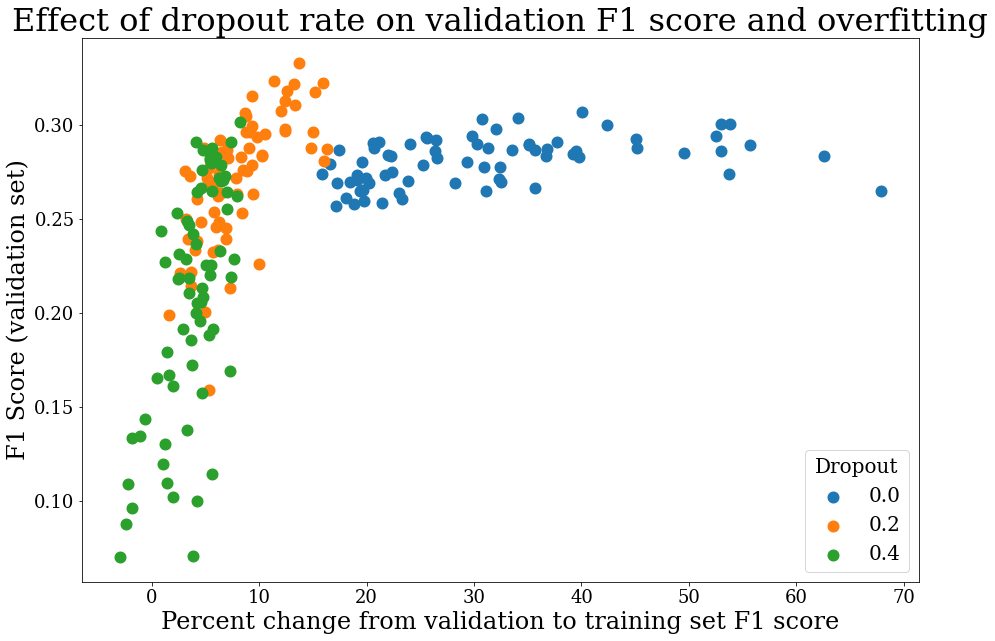

In [102]:
COLOR_VARIABLE = 'drop'

plt.rc('font', family='serif')
plt.figure(figsize=(15, 10))

for group, grouped_df in sweep_df.groupby(COLOR_VARIABLE):
    train_f1 = grouped_df.train_f1_score.values
    val_f1 = grouped_df.validation_f1_score.values
    f1_pct_change = (train_f1 - val_f1) / val_f1

    val_f1_scores = grouped_df.validation_f1_score.values
#     plt.scatter(f1_pct_change.mean() * 100, val_f1_scores.mean(), linewidths=6, label=group)
    plt.scatter(f1_pct_change * 100, val_f1_scores, linewidths=6, label=group)

plt.title('Effect of dropout rate on validation F1 score and overfitting', fontsize=32)
plt.xlabel('Percent change from validation to training set F1 score', fontsize=24)
plt.ylabel('F1 Score (validation set)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20, title='Dropout', title_fontsize=20, loc=4)
plt.savefig('../figures/dropout_overfitting_vs_f1_PB20200519.pdf', format='pdf')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

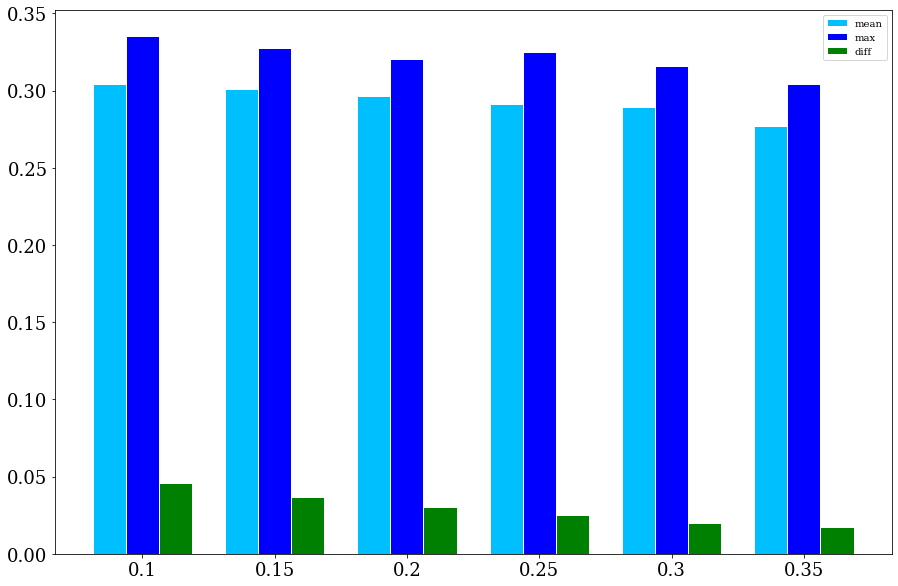

In [30]:
# Mean and max comparison
PARAM = 'drop'
max_val = sweep_df.groupby(PARAM).validation_f1_score.max()
mean_val = sweep_df.groupby(PARAM).validation_f1_score.mean()
diff = sweep_df.groupby(PARAM).train_f1_score.mean() - mean_val

bar_width = 0.25

x = {}
for i in range(3):
    x[i] = np.arange(len(mean_val)) + (i * bar_width)
    
plt.figure(figsize=(15, 10))

plt.bar(x[0], mean_val.values, width=bar_width, color='deepskyblue', label='mean', edgecolor='white')
plt.bar(x[1], max_val.values, width=bar_width, color='blue', label='max', edgecolor='white')
plt.bar(x[2], diff.values, width=bar_width, color='green', label='diff', edgecolor='white')


plt.xticks(x[1], mean_val.index)
plt.legend()

plt.title('', fontsize=32)
plt.xlabel('', fontsize=24)
plt.ylabel('', fontsize=24)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [11]:
cols = ['filters', 'pool_size', 'fully_connected', 'drop', 'loss_diff']

In [12]:
df = sweep_df[cols]

model = smf.ols(formula="loss_diff ~ C(filters) + C(pool_size) + C(fully_connected) + C(drop)",
                data=df)
res = model.fit()

In [13]:
print(res.pvalues)

Intercept                    1.737479e-85
C(filters)[T.(64, 8)]        5.388860e-17
C(filters)[T.(96, 32)]       6.823141e-02
C(filters)[T.(96, 8)]        3.482047e-14
C(pool_size)[T.5]            3.341554e-07
C(pool_size)[T.10]           6.118011e-14
C(fully_connected)[T.100]    9.372753e-01
C(fully_connected)[T.150]    6.010793e-01
C(drop)[T.0.2]               1.818438e-67
C(drop)[T.0.4]               1.914216e-81
dtype: float64


# Dummy Classifier baseline

In [42]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

X = np.zeros(160000)
y = np.repeat(np.arange(16), 10000)
np.random.shuffle(y)

dummy = DummyClassifier(strategy='stratified')
dummy.fit(X, y)

y_pred = dummy.predict(X)

f1_score(y, y_pred, average='macro')

0.06280519503660897